# Behavior of Einstein-Rosen Waves at null infinity by Ashtekar Bicak and Schmidt
##  Geoff Cope
##  Univeristy of Utah
##  January 4, 2022

Here we work with metric 2.1  We find the reduced Einstein Field Equations.  The previous paper in the series is listed down below

https://arxiv.org/abs/gr-qc/9608041

https://arxiv.org/abs/gr-qc/9608042

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols( 't rho phi z dt drho dphi dz' ) 

In [4]:
psi = Function('psi')(t,rho)
psi

In [5]:
gamma = Function('gamma')(t,rho)
gamma

In [6]:
variables = Matrix( [t,rho,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,drho,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( exp(2*psi) * dz**2 + exp(2*(gamma-psi)) * (-dt**2 + drho**2) + rho**2 * exp(-2*psi) * dphi**2 ) 
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, ρ)            ⎥
⎢           0                       0             ρ ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, ρ)⎥
⎣           0                       0                   0         ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, ρ)  -2⋅ψ(t, ρ)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(t, ρ)            ⎥
⎢           0                       0             ρ ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(t, ρ)⎥
⎣           0                       0                   0         ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [17]:
metric = MetricTensor(m,syms)

In [18]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                        
⎢⎡ ⎛     2⋅γ(t, ρ)  -2⋅ψ(t, ρ) ∂                2⋅γ(t, ρ)  -2⋅ψ(t, ρ) ∂          ⎞  -2⋅γ(t, ρ)  2⋅ψ(t, ρ)    ⎛     2⋅γ(t, ρ)  -2⋅ψ(t, ρ) 
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(t, ρ)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(t, ρ))⎟⋅ℯ          ⋅ℯ            -⎜- 2⋅ℯ         ⋅ℯ          ⋅
⎢⎢ ⎝                           ∂t                                     ∂t         ⎠                           ⎝                           
⎢⎢────────────────────────────────────────────────────────────────────────────────────────────────────────  ─────────────────────────────
⎢⎢                                                   2                                                                                   
⎢⎢                                                                                                                                       
⎢⎢ ⎛     2⋅γ(t, ρ)  -2⋅ψ(t, ρ) ∂  

In [19]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                                        
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                      
⎢ρ⋅⎜───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ))⎟ + ──(γ(t, ρ)) - ──(ψ(t, ρ))                            
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ                                     
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                     ρ                                                                                  
⎢                                 

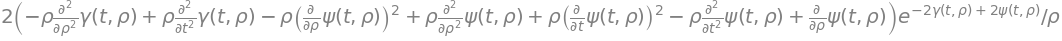

In [20]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                   ⎛      2             
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                 ⎜     ∂              
⎢ρ⋅⎜───(γ(t, ρ)) - ───(γ(t, ρ)) - ───(ψ(t, ρ)) - 2⋅⎜──(ψ(t, ρ))⎟  + ───(ψ(t, ρ))⎟ + ──(γ(t, ρ)) - ──(ψ(t, ρ))   1.0⋅⎜- ρ⋅───(γ(t, ρ)) + ρ
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ                ⎜      2             
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠                                   ⎝    ∂ρ              
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────── + ─────────────────────────
⎢                                                     ρ                                                                                  
⎢                                 

In [22]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [23]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [24]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛    2              2              2                           2     2         ⎞                                                    
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                  
⎢- ρ⋅⎜- ───(γ(t, ρ)) + ───(γ(t, ρ)) + ───(ψ(t, ρ)) + 2⋅⎜──(ψ(t, ρ))⎟  - ───(ψ(t, ρ))⎟ + ──(γ(t, ρ)) - ──(ψ(t, ρ))                        
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ                                 
⎢    ⎝  ∂ρ             ∂t             ∂ρ                                ∂t          ⎠                                                    
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────                        
⎢                                                       ρ                                                                                
⎢                                 

In [25]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                        ∂                                               ∂                                               
⎢               2                2   1.0⋅──(γ(t, ρ))                                     ──(γ(t, ρ))                                     
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                    ∂           ∂             ∂t                                              
⎢- ⎜──(ψ(t, ρ))⎟  - ⎜──(ψ(t, ρ))⎟  + ───────────────       - 2⋅──(ψ(t, ρ))⋅──(ψ(t, ρ)) + ───────────                                     
⎢  ⎝∂ρ         ⎠    ⎝∂t         ⎠           ρ                  ∂ρ          ∂t                 ρ                                          
⎢                                                                                                                                        
⎢                                   ∂                                                         ∂                                          
⎢                                 

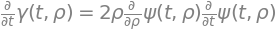

In [36]:
equation2pt5 = Eq( diff(gamma,t) , solve( einsteinSimplified[1,0], diff(gamma,t) )[0] ) 
equation2pt5 

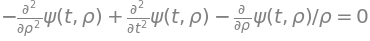

In [66]:
equation2pt6 = Eq(expand((-1/rho)*ricciSimplified[2,2].args[1]),0)
equation2pt6

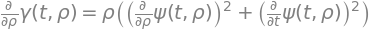

In [71]:
equation2pt7 = Eq(diff(gamma,rho), solve( einsteinSimplified[0,0], diff(gamma,rho))[0] ) 
equation2pt7 

In [72]:
vacuumFieldEquations = Matrix([equation2pt5,equation2pt6,equation2pt7])
vacuumFieldEquations

⎡    ∂                 ∂           ∂              ⎤
⎢    ──(γ(t, ρ)) = 2⋅ρ⋅──(ψ(t, ρ))⋅──(ψ(t, ρ))    ⎥
⎢    ∂t                ∂ρ          ∂t             ⎥
⎢                                                 ⎥
⎢                                 ∂               ⎥
⎢     2              2            ──(ψ(t, ρ))     ⎥
⎢    ∂              ∂             ∂ρ              ⎥
⎢ - ───(ψ(t, ρ)) + ───(ψ(t, ρ)) - ─────────── = 0 ⎥
⎢     2              2                 ρ          ⎥
⎢   ∂ρ             ∂t                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, ρ)) = ρ⋅⎜⎜──(ψ(t, ρ))⎟  + ⎜──(ψ(t, ρ))⎟ ⎟⎥
⎣∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂t         ⎠ ⎠⎦